# Assignment 3 - Decision Tree and Random Forest
For this assignment you will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. You will be creating a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
installment: The monthly installments owed by the borrower if the loan is funded.
log.annual.inc: The natural log of the self-reported annual income of the borrower.
dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
fico: The FICO credit score of the borrower.
days.with.cr.line: The number of days the borrower has had a credit line.
revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
df = pd.read_csv("loan_data.csv")

In [7]:
df

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [15]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

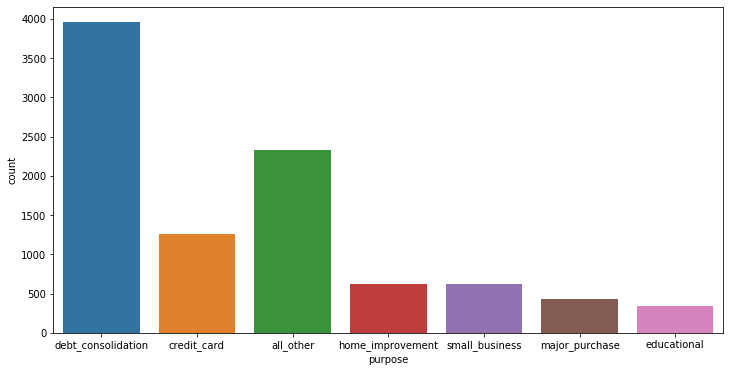

In [35]:
fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x=df['purpose'],ax=ax,data=df)

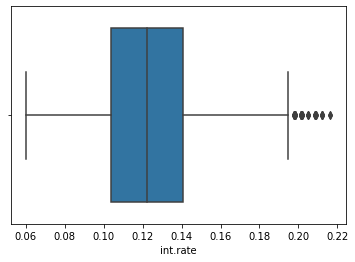

In [23]:
sns.boxplot(x=df['int.rate'])

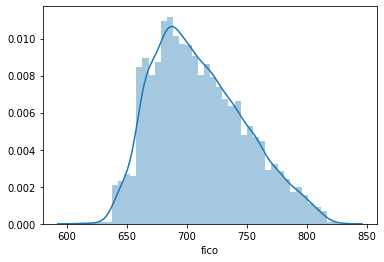

In [24]:
sns.distplot(df['fico'])

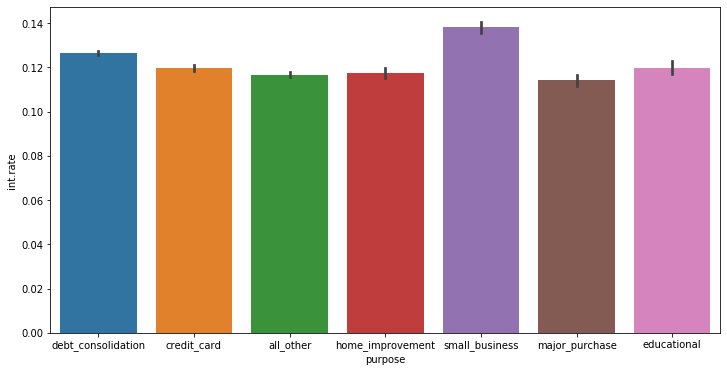

In [32]:

fig_dims = (12, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x=df['purpose'],y=df['int.rate'],ax=ax,data=df)

In [70]:
EncodedDF = pd.get_dummies(df[["purpose"]])
x = pd.concat([EncodedDF,df.drop(["purpose","not.fully.paid"],axis=1)],axis=1)

In [71]:
y = df['not.fully.paid']

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=2,random_state=101)

In [75]:
X_train.shape

(9576, 19)

In [76]:
X_test.shape

(2, 19)

In [77]:
y_train.shape

(9576,)

In [78]:
y_test.shape

(2,)

In [79]:
x.columns

Index(['purpose_all_other', 'purpose_credit_card',
       'purpose_debt_consolidation', 'purpose_educational',
       'purpose_home_improvement', 'purpose_major_purchase',
       'purpose_small_business', 'credit.policy', 'int.rate', 'installment',
       'log.annual.inc', 'dti', 'fico', 'days.with.cr.line', 'revol.bal',
       'revol.util', 'inq.last.6mths', 'delinq.2yrs', 'pub.rec'],
      dtype='object')

In [83]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=4)
decision_tree

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [85]:
decision_tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [90]:
from sklearn.metrics import accuracy_score
prediction = decision_tree.predict(X_test)
print(accuracy_score(y_test,prediction))

1.0


In [91]:
from sklearn.ensemble import RandomForestClassifier
rand_forst = RandomForestClassifier()
rand_forst.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
forst_pred = rand_forst.predict(X_test)

In [97]:
print(accuracy_score(y_test,forst_pred))

1.0
